In [1]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime
from datetime import date, timedelta
import math
import matplotlib as mpl

In [2]:
StartingAmount = 500_000

import libaries

In [3]:
stock = "GOOGL"
daysHistory = 500
std = 5
start = (date.today()-timedelta(daysHistory))

end = date.today()

df = web.DataReader(stock,'yahoo',start,end)

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-08,1488.030029,1465.449951,1465.449951,1483.430054,1303800,1483.430054
2020-10-09,1511.849976,1487.000000,1492.859985,1510.449951,1648300,1510.449951
2020-10-12,1588.420044,1529.300049,1538.000000,1564.589966,2767200,1564.589966
2020-10-13,1585.160034,1558.630005,1577.010010,1567.069946,1953600,1567.069946
2020-10-14,1583.849976,1545.900024,1574.599976,1563.439941,1658700,1563.439941
...,...,...,...,...,...,...
2022-02-14,2726.000000,2665.129883,2665.129883,2710.520020,1715100,2710.520020
2022-02-15,2762.169922,2716.429932,2751.409912,2732.169922,1335600,2732.169922
2022-02-16,2761.719971,2698.479980,2732.929932,2754.760010,1251100,2754.760010


In [4]:
df['Price_Moving_Avg'] = df['Adj Close'].rolling(window=30).mean()
df['Vol_Moving_Avg'] = df['Volume'].rolling(window=30).mean()


In [5]:
df = df[df['Price_Moving_Avg'].notna()]

df

,High,Low,Open,Close,Volume,Adj Close,Price_Moving_Avg,Vol_Moving_Avg
Date,,,,,,,,
2020-11-18,1765.000000,1738.569946,1756.640015,1740.640015,1005400,1740.640015,1638.720325,1.956330e+06
2020-11-19,1763.489990,1730.020020,1733.229980,1758.569946,1005300,1758.569946,1647.891654,1.946380e+06
2020-11-20,1768.359985,1735.000000,1762.000000,1736.380005,1384700,1736.380005,1655.422656,1.937593e+06
2020-11-23,1745.989990,1710.180054,1740.219971,1727.560059,1126500,1727.560059,1660.854993,1.882903e+06
2020-11-24,1766.479980,1720.729980,1727.500000,1763.900024,1399200,1763.900024,1667.415995,1.864423e+06
...,...,...,...,...,...,...,...,...
2022-02-14,2726.000000,2665.129883,2665.129883,2710.520020,1715100,2710.520020,2746.591007,2.252340e+06
2022-02-15,2762.169922,2716.429932,2751.409912,2732.169922,1335600,2732.169922,2741.002336,2.249117e+06
2022-02-16,2761.719971,2698.479980,2732.929932,2754.760010,1251100,2754.760010,2736.561336,2.243487e+06


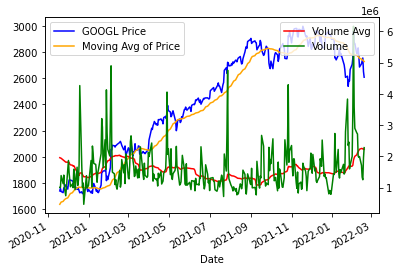

In [6]:
close_price = df["Adj Close"]
mavgplot = df["Price_Moving_Avg"]
vmagplot = df["Vol_Moving_Avg"]
volumePlot = df['Volume']
mpl.rc('figure',figsize=(15,10))
#mpl.style.use('ggplot')

close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
vmagplot.plot(secondary_y=True,label='Volume Avg',legend = True,color='red')
volumePlot.plot(label ='Volume',secondary_y=True,legend =False,color = 'green')
mpl.pyplot.legend(loc="upper right")
mpl.pyplot.show()
#AddPriceMoving Avg

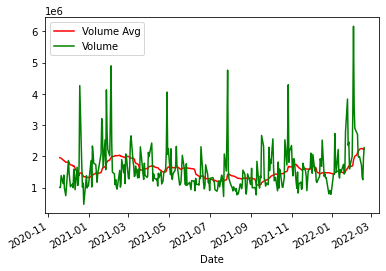

In [7]:
vmagplot.plot(secondary_y=False,label='Volume Avg',legend = True,color='red')
volumePlot.plot(label ='Volume',secondary_y=False,legend =False,color = 'green')
mpl.pyplot.legend()
mpl.pyplot.show()

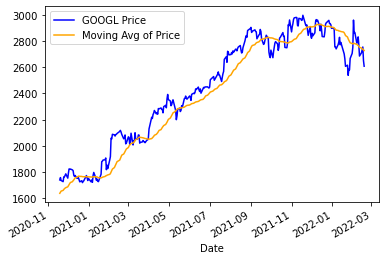

In [8]:
close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
#mpl.pyplot.legend()
mpl.pyplot.show()

In [9]:
df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
# adj close . lt - Price moving

df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])

df

<ipython-input-9-8028a4bc7bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
<ipython-input-9-8028a4bc7bdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])


,High,Low,Open,Close,Volume,Adj Close,Price_Moving_Avg,Vol_Moving_Avg,Price Lower than MAVG,Volume Higher than MAVG
Date,,,,,,,,,,
2020-11-18,1765.000000,1738.569946,1756.640015,1740.640015,1005400,1740.640015,1638.720325,1.956330e+06,False,True
2020-11-19,1763.489990,1730.020020,1733.229980,1758.569946,1005300,1758.569946,1647.891654,1.946380e+06,False,True
2020-11-20,1768.359985,1735.000000,1762.000000,1736.380005,1384700,1736.380005,1655.422656,1.937593e+06,False,True
2020-11-23,1745.989990,1710.180054,1740.219971,1727.560059,1126500,1727.560059,1660.854993,1.882903e+06,False,True
2020-11-24,1766.479980,1720.729980,1727.500000,1763.900024,1399200,1763.900024,1667.415995,1.864423e+06,False,True
...,...,...,...,...,...,...,...,...,...,...
2022-02-14,2726.000000,2665.129883,2665.129883,2710.520020,1715100,2710.520020,2746.591007,2.252340e+06,True,True
2022-02-15,2762.169922,2716.429932,2751.409912,2732.169922,1335600,2732.169922,2741.002336,2.249117e+06,True,True
2022-02-16,2761.719971,2698.479980,2732.929932,2754.760010,1251100,2754.760010,2736.561336,2.243487e+06,False,True


In [10]:
z=1
PL=0.00
Total_Gain =0
starting_price =1
#PG -> Per_Gain

Start_Price = (df['Adj Close'].head(1))
Start_Price = float(Start_Price)
print("Start Price:", Start_Price)

End_Price = (df['Adj Close'].tail(1))
End_Price = float(End_Price)
print("End Price:", End_Price)

Return = (PL/Start_Price)
Return_Per = "{:.2%}".format(Return)



benchRe = End_Price - Start_Price
benchREP = (benchRe/Start_Price) 
TotalPro = (benchREP) * StartingAmount
print(TotalPro)

Start Price: 1740.6400146484375
End Price: 2608.06005859375
249166.98359382138


In [11]:
index =0
for date_var,row in df.iterrows():
    maxValue = df.iloc[index-30:index]['Adj Close'].max()
    if(math.isnan(maxValue)):
        maxValue = 0
    if row['Volume Higher than MAVG']==1:
        if row['Price Lower than MAVG']==1:
            if z==1:
                print(date_var,row['Adj Close'], '- BUY')
                close_adj = row['Adj Close']
                starting_price = close_adj
                z -=1
                
    elif(row['Adj Close']>=(maxValue) and maxValue !=0):
        if z==1:
                print(date_var,row['Adj Close'], '- BUYING BC OF TREND INCREASE')
                close_adj = row['Adj Close']
                starting_price = close_adj
                z -=1
    else:
        if row['Volume Higher than MAVG']==0 and row['Price Lower than MAVG']==0 :
                if z==0:
                    print(date_var,row['Adj Close'],'- SELL')
                    close_adj = row['Adj Close']
                    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
                    Total_Gain += single_trade_percent_gain

                    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
                    print()
                    z+=1
        else:
            if (((row['Adj Close']- starting_price)/starting_price) * 100) > .5:
                if z==0:
                    print(date_var,row['Adj Close'],'- SELL DUE TO PRICE INCREASE')
                    close_adj = row['Adj Close']
                    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
                    Total_Gain += single_trade_percent_gain
                    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
                    print()
                    z+=1
    index +=1

if(z==0):
    print(date_var,row['Adj Close'],'- SELL DUE TO LAST DAY')
    close_adj = row['Adj Close']
    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
    Total_Gain += single_trade_percent_gain
    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")

Hold_Return = (End_Price - Start_Price)
Hold_Return_Per = "{:.2%}".format((End_Price-Start_Price)/Start_Price)
TotalReturn = (Total_Gain/100) * StartingAmount
print()
print("The return for holding start to end was: "+str(Hold_Return_Per)+".")
print()
print("Return percentage from all trades: " + str(round(Total_Gain,2))+"% based on "+str(daysHistory)+" days of data")
print("With a starting amount of: $"+str(round(StartingAmount,3))+" it ended with a profit of: $"+str(round(TotalReturn,3)))
print("This algoritm has gained you: $"+str(round(StartingAmount+TotalReturn,3)))



2020-12-15 00:00:00 1761.0799560546875 - BUY
2020-12-28 00:00:00 1773.9599609375 - SELL
This trade gain/loss results: 0.73%

2020-12-29 00:00:00 1757.760009765625 - BUY
2021-01-07 00:00:00 1774.3399658203125 - SELL
This trade gain/loss results: 0.94%

2021-01-12 00:00:00 1737.4300537109375 - BUY
2021-01-19 00:00:00 1784.469970703125 - SELL
This trade gain/loss results: 2.71%

2021-01-20 00:00:00 1880.0699462890625 - BUYING BC OF TREND INCREASE
2021-01-27 00:00:00 1818.93994140625 - SELL
This trade gain/loss results: -3.25%

2021-02-02 00:00:00 1919.1199951171875 - BUYING BC OF TREND INCREASE
2021-02-04 00:00:00 2053.6298828125 - SELL
This trade gain/loss results: 7.01%

2021-03-08 00:00:00 2007.5 - BUY
2021-03-18 00:00:00 2021.3399658203125 - SELL DUE TO PRICE INCREASE
This trade gain/loss results: 0.69%

2021-03-23 00:00:00 2041.3299560546875 - BUY
2021-03-31 00:00:00 2062.52001953125 - SELL
This trade gain/loss results: 1.04%

2021-04-01 00:00:00 2129.780029296875 - BUYING BC OF TREN